## Add necessary imports

In [3]:
import ipywidgets as widgets
from IPython.display import display 
from ipywidgets import interact 
import pandas as pd
from functions import *  
warnings.filterwarnings("ignore")

# Get initial data to find


In [15]:
conflicts_data = pd.read_csv('../docs/conflictsSortedByZone2001-2023.csv', low_memory=False)
psa_index_data = pd.read_csv('../docs/index.csv', low_memory=False)
emdat_data = pd.read_csv('../docs/Iran_Israel_Pakistan_Iraq_Turkey_Syria_Jordan_emdat_simplified.csv', low_memory=False)
merged_ipc_data = pd.read_csv('../docs/merged_ipc.csv',low_memory=False)
merged_oil_futures_data = pd.read_csv('../docs/merged_oil_futures_filled.csv',low_memory=False)
conflicts_data['date_start'] = pd.to_datetime(conflicts_data['date_start'])
psa_index_data['Date'] = pd.to_datetime(psa_index_data['Date'])
merged_ipc_data['date'] = pd.to_datetime(merged_ipc_data['date'])
merged_oil_futures_data['Date'] = pd.to_datetime(merged_oil_futures_data['Date'])
conflicts_data.set_index('date_start', inplace=True)
psa_index_data.set_index('Date', inplace=True)
merged_ipc_data.set_index('date', inplace=True)
merged_oil_futures_data.set_index('Date', inplace=True)
emdat_data.set_index('disaster_date', inplace=True)

emdat_data = emdat_data.loc['2002-01-01':]
conflicts_data = conflicts_data.loc['2002-01-01':]
psa_index_data = psa_index_data.loc['2002-01-01':]
merged_ipc_data = merged_ipc_data.loc['2002-01-01':]
merged_oil_futures_data = merged_oil_futures_data.loc['2002-01-01':]
conflicts_data.head(21312123)

,deaths_civilians_Pakistan,deaths_civilians_Iran,deaths_civilians_Turkey,deaths_civilians_Israel,deaths_civilians_Iraq,deaths_civilians_Syria,deaths_civilians_Jordan,deaths_unknown_Pakistan,deaths_unknown_Iran,deaths_unknown_Turkey,...,deaths_unknown_Syria,deaths_unknown_Jordan,country_Pakistan,country_Iran,country_Turkey,country_Israel,country_Iraq,country_Syria,country_Jordan,conflicts_counts
date_start,,,,,,,,,,,,,,,,,,,,,
2002-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2002-01-11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2002-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2
2002-01-15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3
2002-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3
2022-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3
2022-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2


In [ ]:
emdat_data

In [16]:

# Reemplazar los valores 'K' y 'M' en las columnas de volumen ('Vol._brent' y 'Vol._wti')
merged_oil_futures_data['Vol._brent'] = merged_oil_futures_data['Vol._brent'].str.replace('K', '000').str.replace('M', '000000').astype(float)
merged_oil_futures_data['Vol._wti'] = merged_oil_futures_data['Vol._wti'].str.replace('K', '000').str.replace('M', '000000').astype(float)

# Reemplazar '%' en las columnas 'Change %_brent' y 'Change %_wti'
merged_oil_futures_data['Change %_brent'] = merged_oil_futures_data['Change %_brent'].str.replace('%', '').astype(float)
merged_oil_futures_data['Change %_wti'] = merged_oil_futures_data['Change %_wti'].str.replace('%', '').astype(float)

# Interpolar los valores
merged_oil_futures_data = merged_oil_futures_data.interpolate(method='time')

In [18]:
import numpy as np

# Eliminar las etiquetas de índice duplicadas en psa_index_data
psa_index_data = psa_index_data[~psa_index_data.index.duplicated(keep='first')]

# Eliminar las etiquetas de índice duplicadas en emdat_data
emdat_data = emdat_data[~emdat_data.index.duplicated(keep='first')]

# Asegurarse de que los índices coincidan
emdat_data = emdat_data.reindex(psa_index_data.index)


# Rellenar los valores faltantes con NaN
emdat_data = emdat_data.fillna(-1)

# Aplicar interpolación para llenar los valores NaN
emdat_data = emdat_data.interpolate(method='time')

# Verificar si hay valores nulos después de la interpolación
null_count = emdat_data.isnull().sum()

# Mostrar la cantidad de valores nulos
print("Número de valores nulos después de la interpolación:")
print(null_count)

# Guardar el DataFrame actualizado
emdat_data.to_csv('../docs/emdat_data_updated.csv')


In [ ]:
emdat_data = emdat_data.fillna(-1)

In [19]:
combined_data = psa_index_data.merge(emdat_data, left_index=True, right_index=True, how='outer')
combined_data = combined_data.merge(merged_ipc_data, left_index=True, right_index=True, how='outer')
combined_data = combined_data.merge(merged_oil_futures_data, left_index=True, right_index=True, how='outer')
combined_data = combined_data.merge(conflicts_data, left_index=True, right_index=True, how='outer')


combined_data.head(1515151515)

# Guardar el DataFrame combinado en un archivo CSV
combined_data.to_csv('../docs/combined_data_full.csv')


In [11]:
combined_data.shape

(8171, 73)

In [20]:
# Seleccionar las filas desde 2002 hasta 2023
combined_data = combined_data.loc['2002-01-01':'2023-12-31']

In [21]:
# Seleccionar el rango de fechas desde 2002-01-02 hasta 2020-06-23
selected_dates = combined_data.loc['2002-01-02':'2020-06-22']

# Seleccionar las columnas de interés
columns_with_nulls = ['Price_brent', 'Open_brent', 'High_brent', 'Low_brent', 
                      'Vol._brent', 'Change %_brent', 'Price_wti', 'Open_wti', 
                      'High_wti', 'Low_wti', 'Vol._wti', 'Change %_wti']

# Encontrar las fechas donde hay valores nulos en las columnas seleccionadas
dates_with_nulls = selected_dates[columns_with_nulls][selected_dates[columns_with_nulls].isnull().any(axis=1)].index

# Mostrar las fechas
print("Fechas donde hay valores nulos en las columnas especificadas dentro del rango de fechas seleccionado:")
print(dates_with_nulls)
combined_data = selected_dates

Fechas donde hay valores nulos en las columnas especificadas dentro del rango de fechas seleccionado:
DatetimeIndex([], dtype='datetime64[ns]', freq=None)


In [23]:
# Contar los valores nulos por columna
null_counts = combined_data.isnull().sum()

# Calcular el porcentaje de filas con valores nulos respecto al total de filas
null_percentage = (combined_data.isnull().sum() / len(combined_data)) * 100

# Filtrar las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar las columnas que tienen valores nulos y su porcentaje
print("Columnas con valores nulos y su porcentaje:")
print(columns_with_nulls)
print("\n")

# Calcular el porcentaje de filas con valores nulos respecto al total de filas
total_rows_with_nulls = combined_data.isnull().any(axis=1).sum()
percentage_of_rows_with_nulls = (total_rows_with_nulls / len(combined_data)) * 100
# Mostrar el número de filas con valores nulos y su porcentaje respecto al total de filas
print("Número de filas con valores nulos:", total_rows_with_nulls)
print("Porcentaje de filas con valores nulos respecto al total:", percentage_of_rows_with_nulls)

Columnas con valores nulos y su porcentaje:
Disaster Subgroup            6747
Disaster Type                6747
Country                      6747
Subregion                    6747
Region                       6747
Total Deaths                 6747
Total Affected               6747
CPI                          6747
deaths_civilians_Pakistan     582
deaths_civilians_Iran         582
deaths_civilians_Turkey       582
deaths_civilians_Israel       582
deaths_civilians_Iraq         582
deaths_civilians_Syria        582
deaths_civilians_Jordan       582
deaths_unknown_Pakistan       582
deaths_unknown_Iran           582
deaths_unknown_Turkey         582
deaths_unknown_Israel         582
deaths_unknown_Iraq           582
deaths_unknown_Syria          582
deaths_unknown_Jordan         582
country_Pakistan              582
country_Iran                  582
country_Turkey                582
country_Israel                582
country_Iraq                  582
country_Syria                 582
coun

In [24]:

combined_data.fillna(0, inplace=True)

In [25]:
# Guardar el DataFrame combinado sin filas que tengan valores nulos en un archivo CSV
combined_data.to_csv('../docs/data.csv', index=True)

# Mostrar las primeras filas del DataFrame combinado sin filas que tengan valores nulos
print(combined_data.head())


                  Open        High         Low       Close  Adj Close  \
2002-01-02  109.785643  110.186893  107.121810  108.826291  60.729124   
2002-01-03  109.041778  110.330741  108.228961  109.476767  61.123635   
2002-01-04  109.585518  111.625430  108.979265  110.664550  61.830605   
2002-01-05  109.788529  111.608293  108.962524  110.584663  61.799914   
2002-01-06  109.991540  111.591155  108.945782  110.504776  61.769223   

                  Volume         RSI      SMA_10      SMA_20      SMA_50  ...  \
2002-01-02  3.646195e+07  316.156339  107.906098  106.725313  104.614909  ...   
2002-01-03  3.377696e+07  307.801220  108.398298  106.901267  104.760061  ...   
2002-01-04  2.895490e+07  317.807298  108.777951  106.990244  104.938742  ...   
2002-01-05  4.355186e+07  320.516639  108.934105  107.057661  105.002419  ...   
2002-01-06  5.814882e+07  323.225979  109.090259  107.125077  105.066096  ...   

            deaths_unknown_Syria  deaths_unknown_Jordan  country_Pakistan 

In [56]:
combined_data.shape

(14782, 73)

In [107]:
combined_data.shape

(8171, 73)

In [26]:
data = pd.read_csv('../docs/data.csv')

In [27]:
data.head()
# Convertir la columna "Unnamed: 0" a tipo datetime y establecerla como índice
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])
data.set_index('Unnamed: 0', inplace=True)

In [28]:
# Contar los valores nulos por columna
null_counts = data.isnull().sum()
print(null_counts)

Open                0
High                0
Low                 0
Close               0
Adj Close           0
                   ..
country_Israel      0
country_Iraq        0
country_Syria       0
country_Jordan      0
conflicts_counts    0
Length: 73, dtype: int64


In [29]:
# Ver las primeras filas del DataFrame
print(data.head())

# Ver las últimas filas del DataFrame
print(data.tail())

# Ver muestras aleatorias de filas del DataFrame
print(data.sample(5))  # Muestra 5 filas aleatorias


                  Open        High         Low       Close  Adj Close  \
Unnamed: 0                                                              
2002-01-02  109.785643  110.186893  107.121810  108.826291  60.729124   
2002-01-03  109.041778  110.330741  108.228961  109.476767  61.123635   
2002-01-04  109.585518  111.625430  108.979265  110.664550  61.830605   
2002-01-05  109.788529  111.608293  108.962524  110.584663  61.799914   
2002-01-06  109.991540  111.591155  108.945782  110.504776  61.769223   

                  Volume         RSI      SMA_10      SMA_20      SMA_50  ...  \
Unnamed: 0                                                                ...   
2002-01-02  3.646195e+07  316.156339  107.906098  106.725313  104.614909  ...   
2002-01-03  3.377696e+07  307.801220  108.398298  106.901267  104.760061  ...   
2002-01-04  2.895490e+07  317.807298  108.777951  106.990244  104.938742  ...   
2002-01-05  4.355186e+07  320.516639  108.934105  107.057661  105.002419  ...   
20

In [15]:
data.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,RSI,SMA_10,SMA_20,...,Vol._wti,Change %_wti,Disaster Subgroup,Disaster Type,Country,Subregion,Region,Total Deaths,Total Affected,CPI
0,2001-01-02 00:00:00,96.622309,98.082934,92.367368,95.240350,56.503570,32715682.0,204.287540,96.725757,96.585911,...,52.32,1.53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2001-01-03 00:00:00,95.062538,99.284034,92.574073,97.846534,57.954431,55069669.0,231.990548,96.753460,96.776427,...,66.63,2.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2001-01-04 00:00:00,96.878803,98.176975,93.872132,96.043198,56.941956,48991476.0,207.347711,96.525842,96.770606,...,74.38,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2001-01-05 00:00:00,95.551093,96.659538,93.262398,94.603158,56.049100,35470572.0,219.169490,96.619127,96.688876,...,63.85,-0.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2001-01-08 00:00:00,94.115624,95.303980,92.071403,93.580510,55.448467,27782514.0,215.188093,96.588947,96.531145,...,76.06,-2.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Obtener un resumen estadístico de los datos numéricos
print(data.describe())

# Obtener información sobre los tipos de datos y valores no nulos
print(data.info())


              Open         High          Low        Close    Adj Close  \
count  1645.000000  1645.000000  1645.000000  1645.000000  1645.000000   
mean    357.015111   359.942357   353.805825   356.894636   278.711061   
std     204.253568   205.823678   202.564562   204.212689   159.205488   
min      25.049808    25.059808    24.422211    24.658388    19.481842   
25%      58.852465    59.437675    58.442696    59.303328    49.043924   
50%     481.072970   485.912891   476.664426   481.468391   362.472148   
75%     502.242473   505.521638   498.377811   502.105666   397.272848   
max     551.888083   556.436602   547.076738   552.713465   459.626147   

             Volume          RSI       SMA_10       SMA_20       SMA_50  ...  \
count  1.645000e+03  1645.000000  1645.000000  1645.000000  1645.000000  ...   
mean   5.337596e+07   372.005341   356.923809   356.944711   356.932973  ...   
std    4.253011e+07   226.517307   204.200874   204.176723   204.053631  ...   
min    9.8476

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlación de variables numéricas
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


NameError: name 'data' is not defined

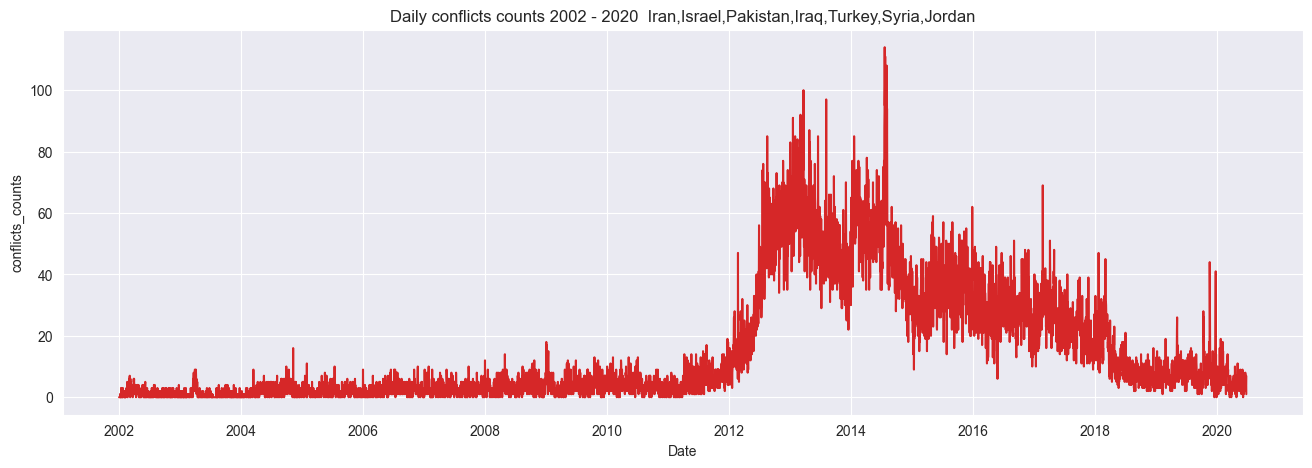

In [30]:

# Draw Plot
def plot_df(data, x, y, title="", xlabel='Date', ylabel='conflicts_counts', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x=data.index, y=data.conflicts_counts, title='Daily conflicts counts 2002 - 2020  Iran,Israel,Pakistan,Iraq,Turkey,Syria,Jordan') 

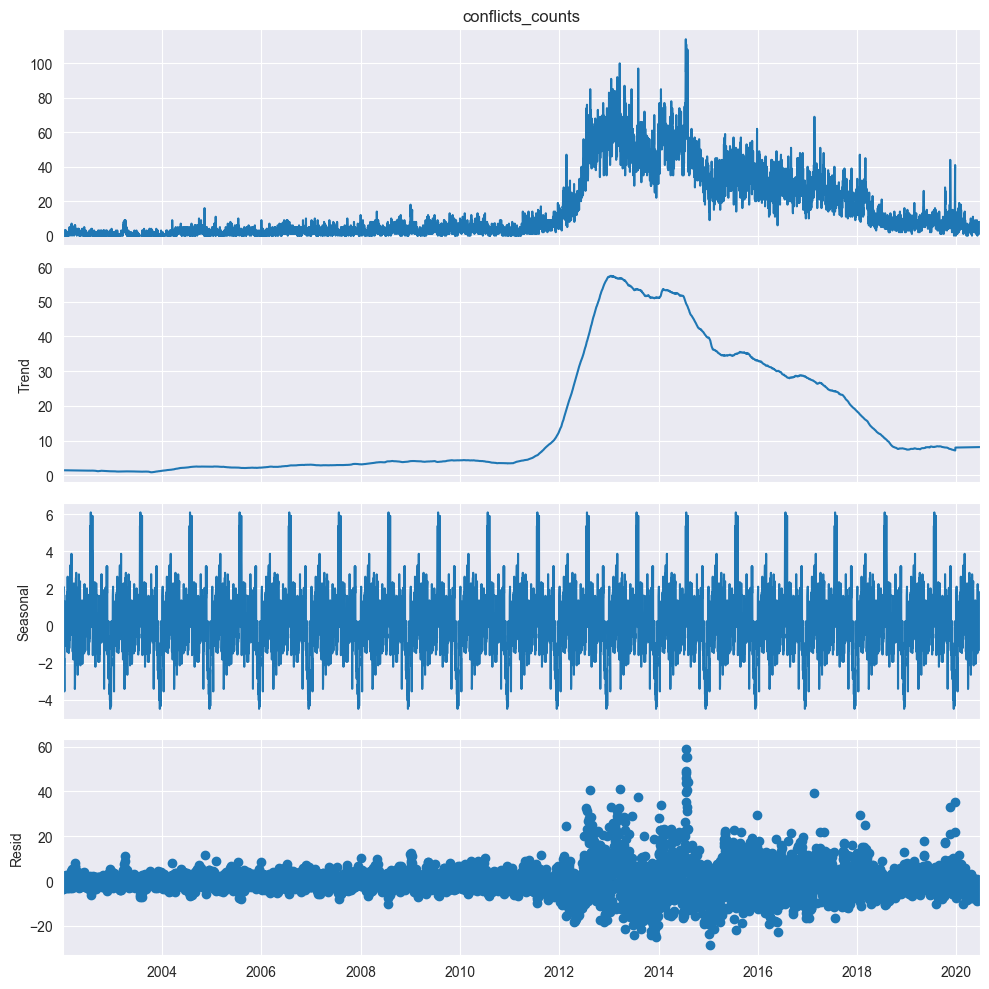

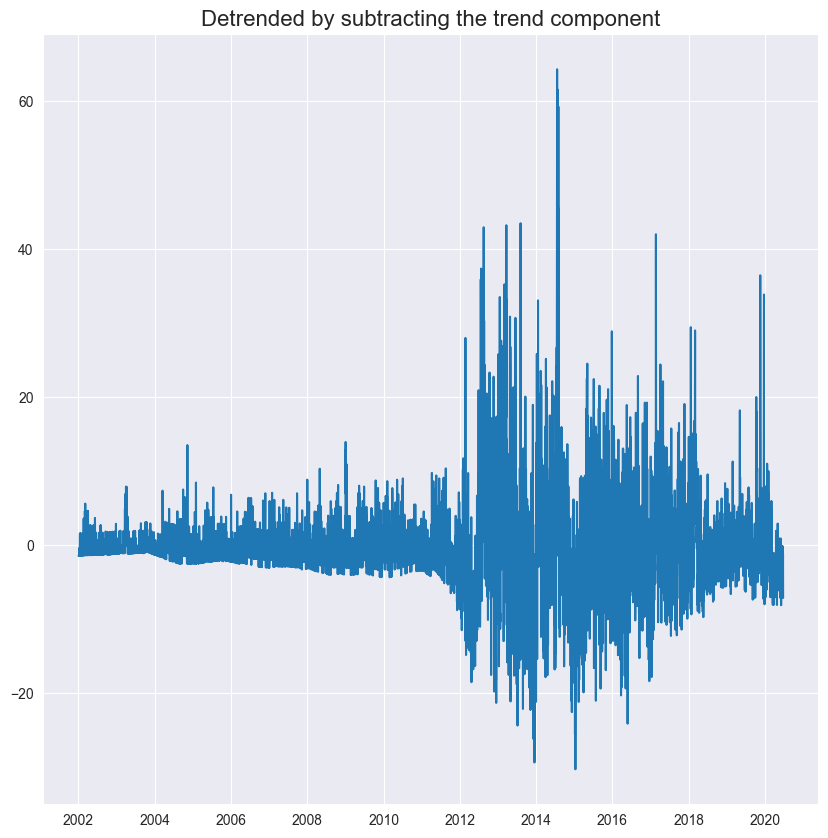

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Especificar el periodo (por ejemplo, si tienes datos diarios y quieres descomponer anualmente, usa 365)
period = 365

# Descomposición aditiva
result_add = seasonal_decompose(data['conflicts_counts'], model='additive', period=period, extrapolate_trend='freq')

# Plot de la descomposición aditiva
plt.rcParams.update({'figure.figsize': (10, 10)})
result_add.plot()
plt.show()

# Detrend
detrended = data['conflicts_counts'] - result_add.trend
plt.plot(detrended)
plt.title('Detrended by subtracting the trend component', fontsize=16)
plt.show()

In [32]:
data = data['2009-06-05':'2020-06-22']

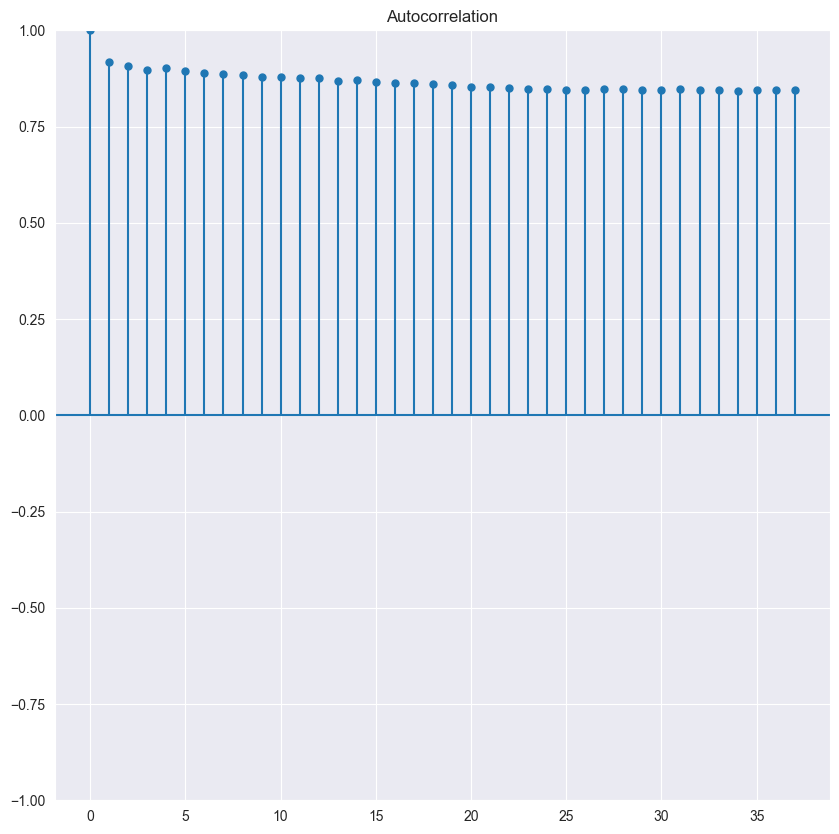

In [33]:
from pmdarima import plot_acf

plot_acf(data['conflicts_counts']);

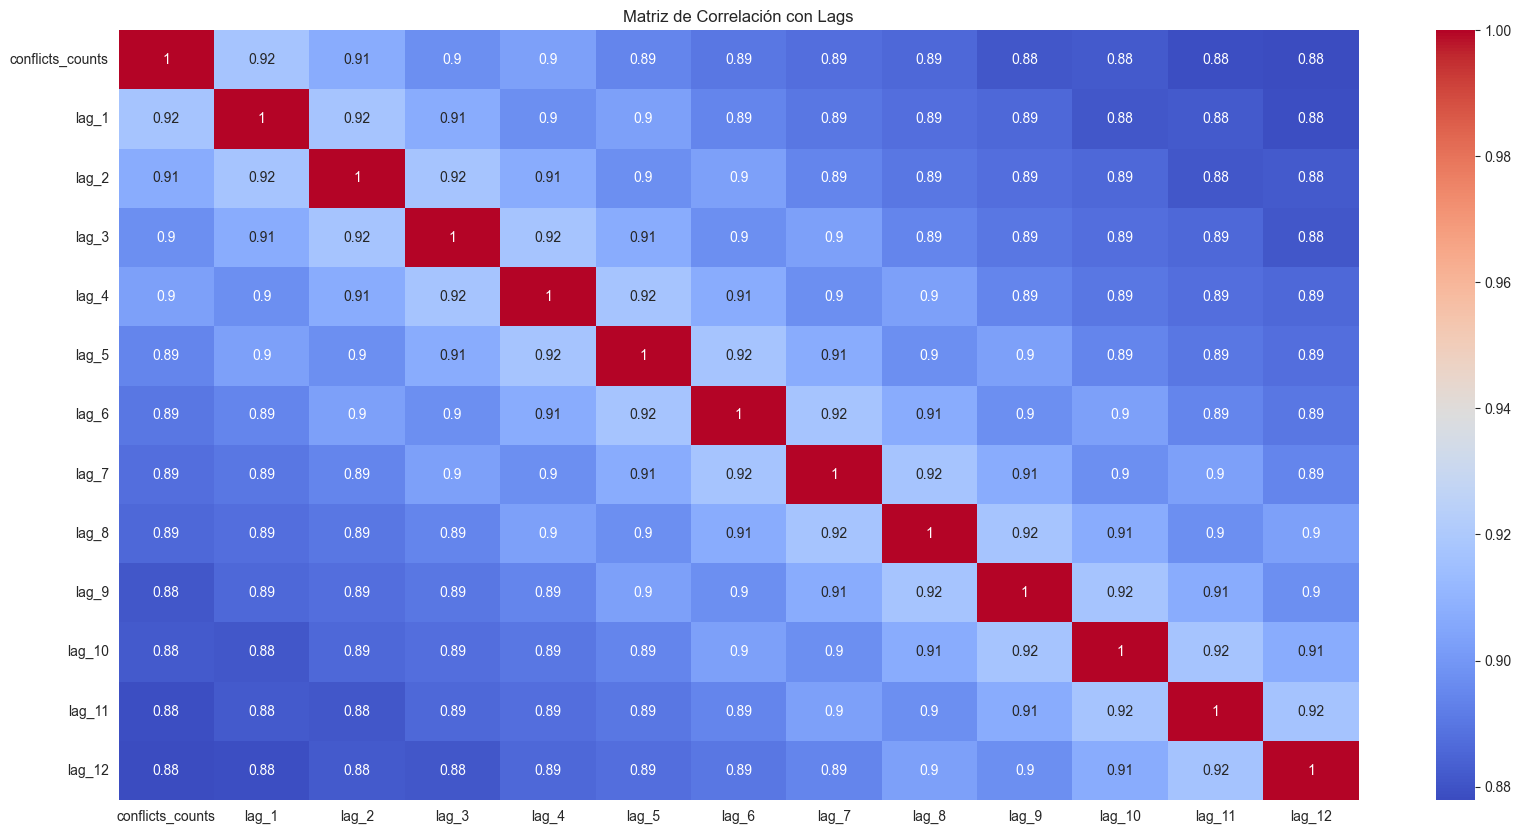

In [255]:
#2
# Creamos columnas para los últimos 5 lags
for lag in range(1, 13):
    data[f'lag_{lag}'] = data['conflicts_counts'].shift(lag)

# Calculamos la matriz de correlación
correlation_matrix = data[['conflicts_counts'] + [f'lag_{lag}' for lag in range(1, 13)]].corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación con Lags')
plt.show()

In [34]:
train = data['2009-06-05':'2019-12-05']
test = data['2019-12-05':'2020-06-22']
data['conflicts_counts'].mean()

23.762636273538156

Columnas constantes: ['Disaster Subgroup', 'Disaster Type', 'Country', 'Subregion', 'Region', 'Total Deaths', 'Total Affected', 'CPI', 'change_ipc_eeuu', 'trend_ipc_eeuu']
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25740.133, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27250.799, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26423.565, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25769.773, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27248.799, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25735.437, Time=2.66 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=26192.242, Time=0.50 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=25734.484, Time=4.51 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=25917.646, Time=0.50 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=25699.163, Time=1.75 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=25860.831, Time=0.68 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=25698.

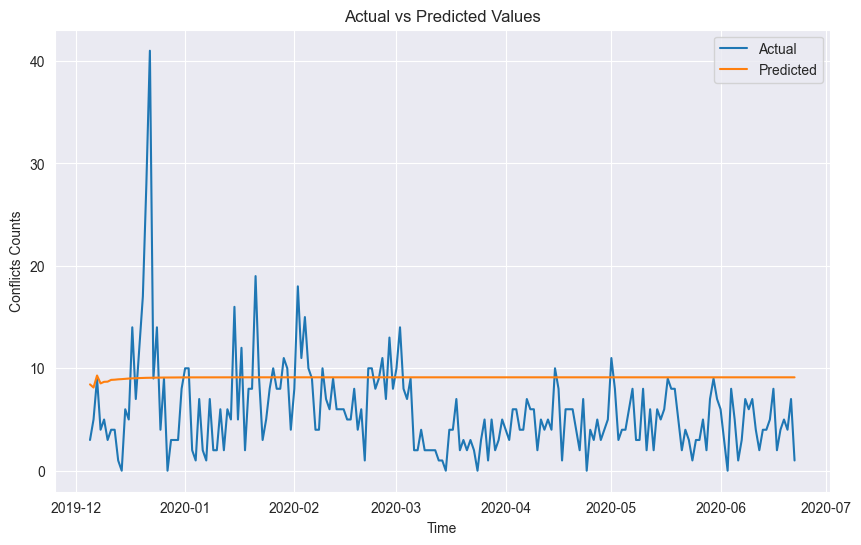

In [35]:
import pandas as pd
from pmdarima import auto_arima
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar las características (features) y el target (conflicts_counts)
features = data.drop(columns=['conflicts_counts'])
target = data['conflicts_counts']

# Dividir los datos en entrenamiento y prueba
train_features = features.loc['2009-06-05':'2019-12-05']
train_target = target.loc['2009-06-05':'2019-12-05']

test_features = features.loc['2019-12-05':'2020-06-22']
test_target = target.loc['2019-12-05':'2020-06-22']

# Verificar si hay una columna constante en los datos exógenos
const_cols = [col for col in train_features.columns if train_features[col].nunique() == 1]
print(f"Columnas constantes: {const_cols}")

# Eliminar columnas constantes
train_features = train_features.drop(columns=const_cols)
test_features = test_features.drop(columns=const_cols)

# Estandarizar los datos
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Ajustar el modelo ARIMA con las características exógenas estandarizadas
model_arima = auto_arima(train_target, exogenous=train_features_scaled, 
                         start_p=1, start_q=1, max_p=5, max_q=5, max_d=3, 
                         trace=True, error_action='ignore', suppress_warnings=True, 
                         stepwise=True)

# exogenous=test_features_scaled
# Hacer predicciones

#predictions = model_arima.predict(n_periods=len(test_target), exogenous=test_features_scaled)
predictions = model_arima.predict(n_periods=len(test_target))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(test_target, predictions)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(test_target, predictions)

# Calcular el porcentaje del error absoluto medio (MAPE)
mape = np.mean(np.abs((test_target - predictions) / test_target)) * 100

# Mostrar las métricas
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"MEAN: {data['conflicts_counts'].mean()}%")
print(f"Error Percentage per mean (EPM): {data['conflicts_counts'].mean()/mae * 100}%")

# Graficar los valores reales vs predicciones
plt.figure(figsize=(10, 6))
plt.plot(test_target, label='Actual')
plt.plot(test_target.index, predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Conflicts Counts')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


Columnas constantes: ['Disaster Subgroup', 'Disaster Type', 'Country', 'Subregion', 'Region', 'Total Deaths', 'Total Affected', 'CPI', 'change_ipc_eeuu', 'trend_ipc_eeuu', 'deaths_civilians_Jordan', 'deaths_unknown_Turkey', 'deaths_unknown_Jordan', 'country_Jordan']
Correlaciones:
 Open                        -0.146470
High                        -0.153269
Low                         -0.136024
Close                       -0.143489
Adj Close                    0.191360
Volume                      -0.129320
RSI                         -0.014136
SMA_10                      -0.156962
SMA_20                      -0.163235
SMA_50                      -0.189965
SMA_100                     -0.185494
SMA_200                     -0.006445
EMA_10                      -0.157576
EMA_20                      -0.167593
EMA_50                      -0.188087
EMA_100                     -0.181486
EMA_200                     -0.195899
EMA_12                      -0.159586
EMA_26                      -0.17

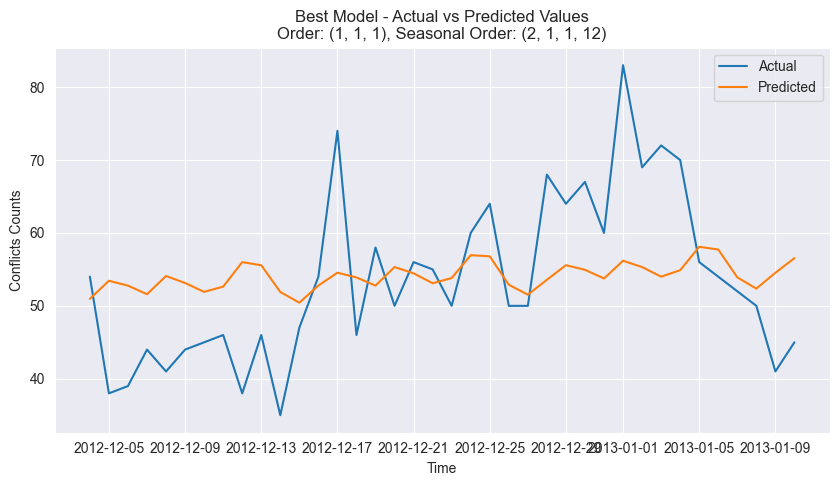

{'MSE': 116.08199643166346,
 'RMSE': 10.77413553059657,
 'MAE': 8.80279766835405,
 'MAPE': 17.934475972864355,
 'EPM': 172.3720025190864}

In [8]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pickle

warnings.filterwarnings("ignore")

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar las características (features) y el target (conflicts_counts)
features = data.drop(columns=['conflicts_counts'])
target = data['conflicts_counts']

# Dividir los datos en entrenamiento y prueba
train_features = features.loc['2009-06-05':'2012-12-05']
train_target = target.loc['2009-06-05':'2012-12-05']

test_features = features.loc['2012-12-04':'2013-01-10']
test_target = target.loc['2012-12-04':'2013-01-10']

# Verificar si hay una columna constante en los datos exógenos
const_cols = [col for col in train_features.columns if train_features[col].nunique() == 1]
print(f"Columnas constantes: {const_cols}")

# Eliminar columnas constantes
train_features = train_features.drop(columns=const_cols)
test_features = test_features.drop(columns=const_cols)

# Análisis de correlación
correlation = train_features.corrwith(train_target)
print("Correlaciones:\n", correlation)

# Eliminar las características con correlación menor a 0.2
important_features = correlation[abs(correlation) >= 0.2].index
print(f"Características importantes seleccionadas: {important_features.tolist()}")

train_features_selected = train_features[important_features]
test_features_selected = test_features[important_features]

# Estandarizar los datos seleccionados
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_selected)
test_features_scaled = scaler.transform(test_features_selected)

# Lista de modelos SARIMAX para probar
models = [
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (2, 1, 2), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (3, 1, 3), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (4, 1, 4), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (1, 0, 1), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (0, 1, 0), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (2, 0, 0), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (0, 1, 1), 'seasonal_order': (1, 1, 1, 12)},
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 2, 12)},
    {'order': (1, 1, 1), 'seasonal_order': (1, 1, 3, 12)},
    {'order': (1, 1, 1), 'seasonal_order': (2, 1, 1, 12)},
    {'order': (1, 1, 1), 'seasonal_order': (2, 1, 2, 12)},
]

# Mantén un seguimiento del mejor modelo y su error
best_model = None
best_rmse = float('inf')
best_order = None
best_seasonal_order = None

for i, model_params in enumerate(models):
    model = SARIMAX(train_target, order=model_params['order'], 
                    seasonal_order=model_params['seasonal_order'])
    results = model.fit(disp=False)
        
    predictions = results.predict(start=len(train_target), end=len(train_target) + len(test_target) - 1, 
                                 exog=test_features_scaled)
    mse = mean_squared_error(test_target, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_target, predictions)
    mape = np.mean(np.abs((test_target - predictions) / test_target)) * 100
    
    print(f"Model {i+1} - Order: {model_params['order']}, Seasonal Order: {model_params['seasonal_order']}")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  MAPE: {mape}%\n")
    print(f"Error Percentage per mean (EPM): {data['conflicts_counts'].mean()/mae * 100}%")
    if rmse < best_rmse:
        best_model = results
        best_rmse = rmse
        best_order = model_params['order']  # Almacena el mejor orden
        best_seasonal_order = model_params['seasonal_order']  # Almacena el mejor orden estacional
    
# Graficar el mejor modelo y sus predicciones
best_predictions = best_model.predict(start=len(train_target), end=len(train_target) + len(test_target) - 1, 
                                      exog=test_features_scaled)

plt.figure(figsize=(10, 5))
plt.plot(test_target, label='Actual')
plt.plot(test_target.index, best_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Conflicts Counts')
plt.title(f'Best Model - Actual vs Predicted Values\nOrder: {best_order}, Seasonal Order: {best_seasonal_order}')
plt.legend()
plt.grid(True)
plt.show()

# Calcular métricas para el mejor modelo
best_mse = mean_squared_error(test_target, best_predictions)
best_rmse = np.sqrt(best_mse)
best_mae = mean_absolute_error(test_target, best_predictions)
best_mape = np.mean(np.abs((test_target - best_predictions) / test_target)) * 100
best_epm = data['conflicts_counts'].mean() / best_mae * 100

# Mostrar las métricas del mejor modelo
best_metrics = {
    "MSE": best_mse,
    "RMSE": best_rmse,
    "MAE": best_mae,
    "MAPE": best_mape,
    "EPM": best_epm
}

# Guardar el mejor modelo
with open('../model/best_sarimax_model_conflicts.pkl', 'wb') as file:
    pickle.dump(best_model, file)

best_metrics


Columnas constantes: ['Disaster Subgroup', 'Disaster Type', 'Country', 'Subregion', 'Region', 'Total Deaths', 'Total Affected', 'CPI', 'change_ipc_eeuu', 'trend_ipc_eeuu', 'deaths_civilians_Jordan', 'deaths_unknown_Turkey', 'deaths_unknown_Jordan', 'country_Jordan']
Correlaciones:
 Open                        -0.028253
High                        -0.028776
Low                         -0.027314
Close                       -0.027959
Adj Close                    0.020531
Volume                      -0.063219
RSI                         -0.000317
SMA_10                      -0.028988
SMA_20                      -0.029366
SMA_50                      -0.031893
SMA_100                     -0.030057
SMA_200                     -0.008849
EMA_10                      -0.028819
EMA_20                      -0.029496
EMA_50                      -0.030171
EMA_100                     -0.026236
EMA_200                     -0.020923
EMA_12                      -0.028953
EMA_26                      -0.02

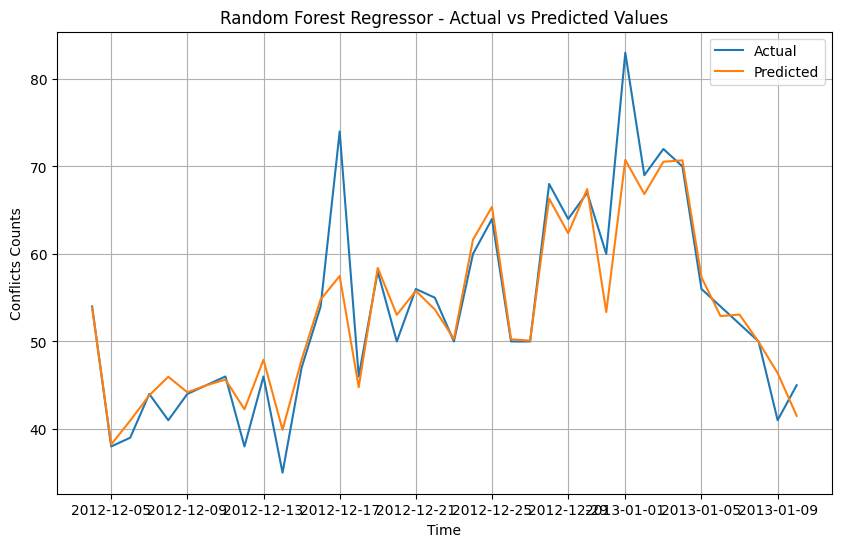

AttributeError: 'RandomForestRegressor' object has no attribute 'save'

In [21]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar las características (features) y el target (conflicts_counts)
features = data.drop(columns=['conflicts_counts'])
target = data['conflicts_counts']

train_features = features.loc['2009-06-05':'2012-12-05']
train_target = target.loc['2009-06-05':'2012-12-05']

test_features = features.loc['2012-12-04':'2013-01-10']
test_target = target.loc['2012-12-04':'2013-01-10']

# Verificar si hay una columna constante en los datos exógenos
const_cols = [col for col in train_features.columns if train_features[col].nunique() == 1]
print(f"Columnas constantes: {const_cols}")

# Eliminar columnas constantes
train_features = train_features.drop(columns=const_cols)
test_features = test_features.drop(columns=const_cols)

# Análisis de correlación
correlation = train_features.corrwith(train_target)
print("Correlaciones:\n", correlation)

# Eliminar las características con correlación menor a 0.2
important_features = correlation[abs(correlation) >= 0.2].index
print(f"Características importantes seleccionadas: {important_features.tolist()}")

train_features_selected = train_features[important_features]
test_features_selected = test_features[important_features]

# Estandarizar los datos seleccionados
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_selected)
test_features_scaled = scaler.transform(test_features_selected)

# Entrenar un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(train_features_scaled, train_target)

# Hacer predicciones en el conjunto de prueba
predictions = rf_regressor.predict(test_features_scaled)

# Calcular métricas de evaluación
mse = mean_squared_error(test_target, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_target, predictions)
mape = np.mean(np.abs((test_target - predictions) / test_target)) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Error Percentage per mean (EPM): {data['conflicts_counts'].mean()/mae * 100}%")
# Guardar el mejor modelo
joblib.dump(rf_regressor, 'best_random_forest_model.pkl')
# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(test_target.index, test_target, label='Actual')
plt.plot(test_target.index, predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Conflicts Counts')
plt.title('Random Forest Regressor - Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
rf_regressor.save('Random Forest Regressor.pkl')

Columnas constantes: ['Disaster Subgroup', 'Disaster Type', 'Country', 'Subregion', 'Region', 'Total Deaths', 'Total Affected', 'CPI', 'change_ipc_eeuu', 'trend_ipc_eeuu', 'deaths_civilians_Jordan', 'deaths_unknown_Turkey', 'deaths_unknown_Jordan', 'country_Jordan']
Correlaciones:
 Open                        -0.028253
High                        -0.028776
Low                         -0.027314
Close                       -0.027959
Adj Close                    0.020531
Volume                      -0.063219
RSI                         -0.000317
SMA_10                      -0.028988
SMA_20                      -0.029366
SMA_50                      -0.031893
SMA_100                     -0.030057
SMA_200                     -0.008849
EMA_10                      -0.028819
EMA_20                      -0.029496
EMA_50                      -0.030171
EMA_100                     -0.026236
EMA_200                     -0.020923
EMA_12                      -0.028953
EMA_26                      -0.02

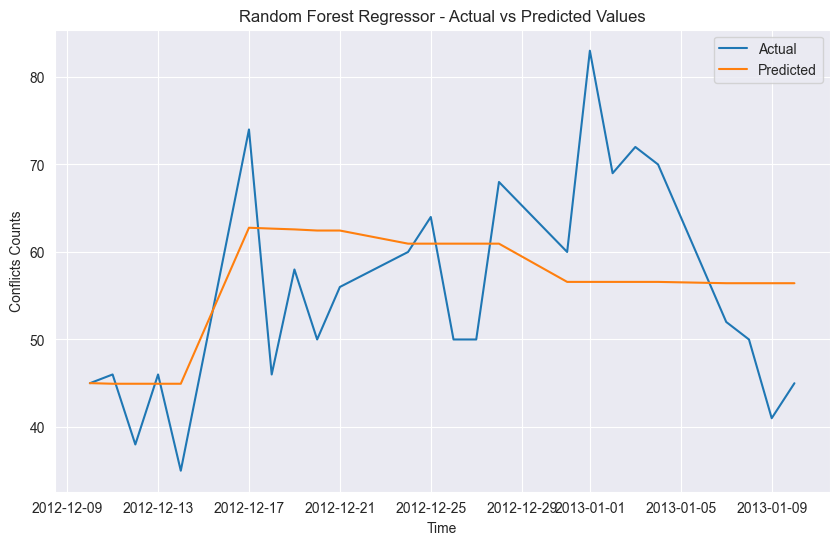

In [16]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar las características (features) y el target (conflicts_counts)
features = data.drop(columns=['conflicts_counts'])
target = data['conflicts_counts']

train_features = features.loc['2009-06-05':'2012-12-05']
train_target = target.loc['2009-06-05':'2012-12-05']

test_features = features.loc['2012-12-04':'2013-01-10']
test_target = target.loc['2012-12-04':'2013-01-10']

# Verificar si hay una columna constante en los datos exógenos
const_cols = [col for col in train_features.columns if train_features[col].nunique() == 1]
print(f"Columnas constantes: {const_cols}")

# Eliminar columnas constantes
train_features = train_features.drop(columns=const_cols)
test_features = test_features.drop(columns=const_cols)

# Análisis de correlación
correlation = train_features.corrwith(train_target)
print("Correlaciones:\n", correlation)

# Eliminar las características con correlación menor a 0.2
important_features = correlation[abs(correlation) >= 0.01].index
print(f"Características importantes seleccionadas: {important_features.tolist()}")

train_features_selected = train_features[important_features]
test_features_selected = test_features[important_features]

# Estandarizar los datos seleccionados
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_selected)
test_features_scaled = scaler.transform(test_features_selected)

# Entrenar un modelo de Random Forest Regressor para cada característica importante
models = {}
for feature in important_features:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(train_features_scaled, train_features_selected[feature])
    models[feature] = model

# Entrenar el modelo para el target
conflicts_model = RandomForestRegressor(n_estimators=100, random_state=42)
conflicts_model.fit(train_features_scaled, train_target)

# Inicializar las predicciones
predictions = []

# Encontrar los lunes en el conjunto de prueba
mondays = test_features_selected[test_features_selected.index.weekday == 0]

# Realizar predicciones iterativas para 5 días a partir de cada lunes
for start_date in mondays.index:
    end_date = start_date + pd.Timedelta(days=4)
    # Asegurar que el periodo sea de lunes a viernes
    if end_date.weekday() != 4:
        continue
        
    current_features = test_features_selected.loc[start_date]
    current_features_scaled = scaler.transform([current_features])
    
    for date in pd.date_range(start=start_date, end=end_date, freq='D'):
        if date not in test_features_selected.index:
            break
            
        next_day_features = {}
        for feature in important_features:
            next_day_prediction = models[feature].predict(current_features_scaled)
            next_day_features[feature] = next_day_prediction[0]
        
        # Predecir 'conflicts_counts'
        next_day_conflicts_prediction = conflicts_model.predict(current_features_scaled)
        predictions.append((date, next_day_conflicts_prediction[0]))
        
        # Actualizar current_features_scaled para la siguiente predicción
        current_features = pd.Series(next_day_features)
        current_features_scaled = scaler.transform([current_features])

# Crear un DataFrame para las predicciones
predictions_df = pd.DataFrame(predictions, columns=['Date', 'Predictions'])
predictions_df.set_index('Date', inplace=True)

# Asegurarse de que test_target y predictions_df tengan la misma longitud
test_target = test_target[test_target.index.isin(predictions_df.index)]
predictions_df = predictions_df[predictions_df.index.isin(test_target.index)]

# Calcular métricas de evaluación en el conjunto de prueba
mse = mean_squared_error(test_target, predictions_df['Predictions'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_target, predictions_df['Predictions'])
mape = np.mean(np.abs((test_target - predictions_df['Predictions']) / test_target)) * 100
epm = mae / test_target.mean() * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Error Percentage per Mean (EPM): {epm}%")

# Guardar los mejores modelos
joblib.dump(models, 'best_random_forest_models.pkl')
joblib.dump(conflicts_model, 'best_random_forest_conflicts_model.pkl')

# Graficar las predicciones en el intervalo de prueba
plt.figure(figsize=(10, 6))
plt.plot(test_target.index, test_target, label='Actual')
plt.plot(predictions_df.index, predictions_df['Predictions'], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Conflicts Counts')
plt.title('Random Forest Regressor - Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar las características (features) y el target (conflicts_counts)
features = data.drop(columns=['conflicts_counts'])
target = data['conflicts_counts']

train_features = features.loc['2009-06-05':'2012-12-05']
train_target = target.loc['2009-06-05':'2012-12-05']

test_features = features.loc['2012-12-04':'2013-01-10']
test_target = target.loc['2012-12-04':'2013-01-10']

# Verificar si hay una columna constante en los datos exógenos
const_cols = [col for col in train_features.columns if train_features[col].nunique() == 1]
print(f"Columnas constantes: {const_cols}")

# Eliminar columnas constantes
train_features = train_features.drop(columns=const_cols)
test_features = test_features.drop(columns=const_cols)

# Análisis de correlación
correlation = train_features.corrwith(train_target)
print("Correlaciones:\n", correlation)

# Eliminar las características con correlación menor a 0.2
important_features = correlation[abs(correlation) >= 0.01].index
print(f"Características importantes seleccionadas: {important_features.tolist()}")

train_features_selected = train_features[important_features]
test_features_selected = test_features[important_features]

# Estandarizar los datos seleccionados
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_selected)
test_features_scaled = scaler.transform(test_features_selected)

# Función para buscar los mejores hiperparámetros y evaluar un modelo de regresión
def grid_search_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    return best_model, best_params

# Definir los modelos y sus hiperparámetros para Grid Search
models_param_grids = {
    "Linear Regression": (LinearRegression(), {}),
    "Polynomial Regression": (
        Pipeline([
            ('polynomialfeatures', PolynomialFeatures()),
            ('linearregression', LinearRegression())
        ]),
        {
            'polynomialfeatures__degree': [2, 3],
            'linearregression__fit_intercept': [True, False]
        }
    ),
    "Random Forest": (
        RandomForestRegressor(random_state=42),
        {
            'n_estimators': [100, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    )
}

# Crear un conjunto de validación a partir del conjunto de entrenamiento
valid_size = int(0.2 * len(train_features_scaled))
X_train, X_valid = train_features_scaled[:-valid_size], train_features_scaled[-valid_size:]
y_train, y_valid = train_target[:-valid_size], train_target[-valid_size:]

# Entrenar un modelo de regresión para cada característica importante
models = {}
for feature in important_features:
    y_train_feature = train_features_selected[feature][:len(X_train)]
    y_valid_feature = train_features_selected[feature][-valid_size:]

    best_mse = float('inf')
    best_model = None
    best_params = None

    for model_name, (model, param_grid) in models_param_grids.items():
        model, params = grid_search_model(model, param_grid, X_train, y_train_feature)
        mse = mean_squared_error(y_valid_feature, model.predict(X_valid))
        
        if mse < best_mse:
            best_mse = mse
            best_model = model
            best_params = params

    print(f"Best model for {feature}: {best_model} with params: {best_params}")
    models[feature] = best_model

# Entrenar el modelo para el target
best_mse = float('inf')
best_conflicts_model = None
best_conflicts_params = None

for model_name, (model, param_grid) in models_param_grids.items():
    model, params = grid_search_model(model, param_grid, X_train, y_train)
    mse = mean_squared_error(y_valid, model.predict(X_valid))
    
    if mse < best_mse:
        best_mse = mse
        best_conflicts_model = model
        best_conflicts_params = params

print(f"Best model for target: {best_conflicts_model} with params: {best_conflicts_params}")

# Inicializar las predicciones
predictions = []

# Encontrar los lunes en el conjunto de prueba
mondays = test_features_selected[test_features_selected.index.weekday == 0]

# Realizar predicciones iterativas para 5 días a partir de cada lunes
for start_date in mondays.index:
    end_date = start_date + pd.Timedelta(days=4)
    # Asegurar que el periodo sea de lunes a viernes
    if end_date.weekday() != 4:
        continue
        
    current_features = test_features_selected.loc[start_date]
    current_features_scaled = scaler.transform([current_features])
    
    for date in pd.date_range(start=start_date, end=end_date, freq='D'):
        if date not in test_features_selected.index:
            break
            
        next_day_features = {}
        for feature in important_features:
            next_day_prediction = models[feature].predict(current_features_scaled)
            next_day_features[feature] = next_day_prediction[0]
        
        # Predecir 'conflicts_counts'
        next_day_conflicts_prediction = best_conflicts_model.predict(current_features_scaled)
        predictions.append((date, next_day_conflicts_prediction[0]))
        
        # Actualizar current_features_scaled para la siguiente predicción
        current_features = pd.Series(next_day_features)
        current_features_scaled = scaler.transform([current_features])

# Crear un DataFrame para las predicciones
predictions_df = pd.DataFrame(predictions, columns=['Date', 'Predictions'])
predictions_df.set_index('Date', inplace=True)

# Asegurarse de que test_target y predictions_df tengan la misma longitud
test_target = test_target[test_target.index.isin(predictions_df.index)]
predictions_df = predictions_df[predictions_df.index.isin(test_target.index)]

# Calcular métricas de evaluación en el conjunto de prueba
mse = mean_squared_error(test_target, predictions_df['Predictions'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_target, predictions_df['Predictions'])
mape = np.mean(np.abs((test_target - predictions_df['Predictions']) / test_target)) * 100
epm = mae / test_target.mean() * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Error Percentage per Mean (EPM): {epm}%")

# Guardar los mejores modelos
joblib.dump(models, 'best_random_forest_models.pkl')
joblib.dump(best_conflicts_model, 'best_random_forest_conflicts_model.pkl')

# Graficar las predicciones en el intervalo de prueba
plt.figure(figsize=(10, 6))
plt.plot(test_target.index, test_target, label='Actual')
plt.plot(predictions_df.index, predictions_df['Predictions'], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Conflicts Counts')
plt.title('Model - Actual vs Predicted Conflicts Counts')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
!pip install --upgrade tensorflow

In [6]:
!pip uninstall keras

^C


In [5]:
!pip install tensorflow

In [7]:
from IPython.display import display, Javascript
display(Javascript('Jupyter.notebook.kernel.restart()'))

<IPython.core.display.Javascript object>

In [9]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [5]:
!pip install prophet

10:17:55 - cmdstanpy - INFO - Chain [1] start processing
10:17:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 239.58864622800408
Root Mean Squared Error (RMSE): 15.478651305201112
Mean Absolute Error (MAE): 13.350728570007938
Mean Absolute Percentage Error (MAPE): nan%
Error Percentage per Mean (EPM): 24.34783325837314%


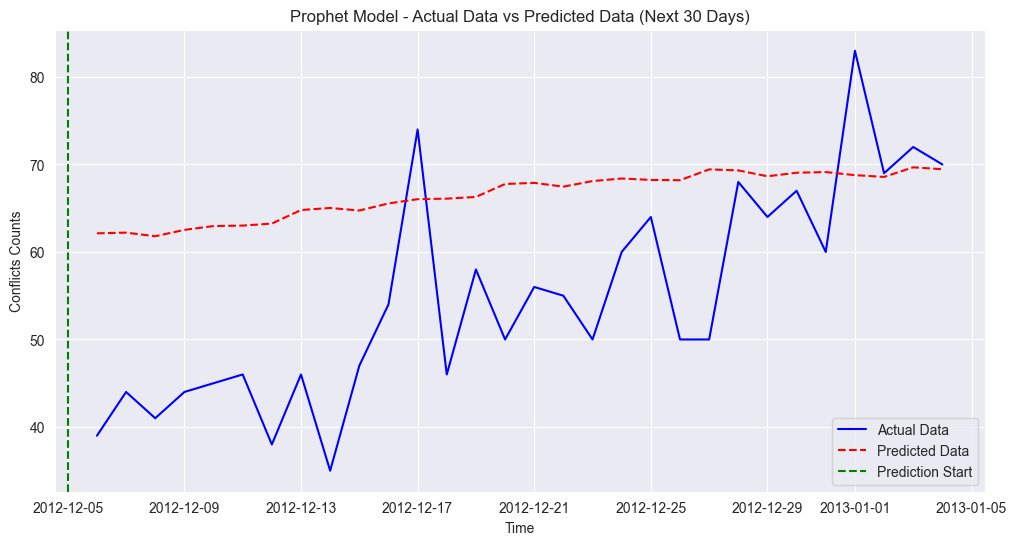

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Cargar los datos
data = pd.read_csv('../docs/data.csv', index_col=0, parse_dates=True)

# Seleccionar el target (conflicts_counts)
target = data['conflicts_counts'].reset_index()
target.rename(columns={'index': 'ds', 'conflicts_counts': 'y'}, inplace=True)

# Dividir los datos en entrenamiento
train_data = target.loc[(target['ds'] >= '2009-06-05') & (target['ds'] <= '2012-12-05')]

# Definir y entrenar el modelo Prophet
model = Prophet()
model.fit(train_data)

# Crear un dataframe para predicciones futuras (30 días)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Obtener las fechas y los valores predichos para los próximos 30 días
future_dates = forecast['ds'].iloc[-30:]
future_predictions = forecast['yhat'].iloc[-30:]

# Obtener los datos reales para los próximos 30 días
real_future_data = target.loc[target['ds'].isin(future_dates)]

# Calcular métricas de error
mse = mean_squared_error(real_future_data['y'], future_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_future_data['y'], future_predictions)
mape = np.mean(np.abs((real_future_data['y'] - future_predictions) / real_future_data['y'])) * 100
epm = (mae / real_future_data['y'].mean()) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Error Percentage per Mean (EPM): {epm}%")

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Graficar los datos reales solo en el intervalo de las predicciones
plt.plot(real_future_data['ds'], real_future_data['y'], label='Actual Data', color='blue')

# Graficar las predicciones futuras
plt.plot(future_dates, future_predictions, label='Predicted Data', linestyle='--', color='red')

# Configurar la gráfica
plt.axvline(x=train_data['ds'].iloc[-1], color='green', linestyle='--', label='Prediction Start')
plt.xlabel('Time')
plt.ylabel('Conflicts Counts')
plt.title('Prophet Model - Actual Data vs Predicted Data (Next 30 Days)')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()
